In [1]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
data = pd.read_excel(r'Data.xlsx', encoding = 'utf-8')

In [7]:
data.head()

,Unnamed: 0,ID,Sexe,Motorisé,PropriétaireImmobilier,NombreEnfants,RevenuAnnuel,SecteurActivité,NiveauEducation,EtatCivil,TypeLogement,CategorieEmploi,MembreFamille,Age,Experience,Approuvée,target
0,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,58,3,No,0
1,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No,0
2,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No,0
3,5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No,0
4,6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No,0


In [5]:
print(data.dtypes)

ID                          int64
Sexe                       object
Motorisé                   object
PropriétaireImmobilier     object
NombreEnfants               int64
RevenuAnnuel              float64
SecteurActivité            object
NiveauEducation            object
EtatCivil                  object
TypeLogement               object
CategorieEmploi            object
MembreFamille               int64
Age                         int64
Experience                  int64
Approuvée                  object
target                      int64
dtype: object


In [7]:
print(data.shape)

(25134, 16)


In [8]:
data.shape

(25134, 16)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 36456
Data columns (total 16 columns):
ID                        25134 non-null int64
Sexe                      25134 non-null object
Motorisé                  25134 non-null object
PropriétaireImmobilier    25134 non-null object
NombreEnfants             25134 non-null int64
RevenuAnnuel              25134 non-null float64
SecteurActivité           25134 non-null object
NiveauEducation           25134 non-null object
EtatCivil                 25134 non-null object
TypeLogement              25134 non-null object
CategorieEmploi           25134 non-null object
MembreFamille             25134 non-null int64
Age                       25134 non-null int64
Experience                25134 non-null int64
Approuvée                 25134 non-null object
target                    25134 non-null int64
dtypes: float64(1), int64(6), object(9)
memory usage: 3.3+ MB


In [19]:
print(data.isnull().sum())

ID                        0
Sexe                      1
Motorisé                  0
PropriétaireImmobilier    0
NombreEnfants             0
RevenuAnnuel              0
SecteurActivité           0
NiveauEducation           0
EtatCivil                 0
TypeLogement              0
CategorieEmploi           0
MembreFamille             0
Age                       0
Experience                0
Approuvée                 0
target                    0
dtype: int64


In [24]:
data['Sexe'].value_counts()

F    15630
M     9503
Name: Sexe, dtype: int64

In [33]:
data['CategorieEmploi'].value_counts()

Accountants       25129
Sales staff           4
Security staff        1
Name: CategorieEmploi, dtype: int64

In [4]:
data['NiveauEducation'].value_counts()

Secondary / secondary special    16808
Higher education                  7132
Incomplete higher                  993
Lower secondary                    187
Academic degree                     14
Name: NiveauEducation, dtype: int64

In [34]:
data['SecteurActivité'].value_counts()

Working                 15622
Commercial associate     7052
State servant            2437
Pensioner                  13
Student                    10
Name: SecteurActivité, dtype: int64

In [35]:
data.describe()

,ID,NombreEnfants,RevenuAnnuel,MembreFamille,Age,Experience,target
count,2.513400e+04,25134.000000,2.513400e+04,25134.000000,25134.000000,25134.000000,25134.000000
mean,5.078838e+06,0.512334,1.948339e+05,2.294064,40.025662,6.693523,0.016790
std,4.194102e+04,0.787785,1.045110e+05,0.947590,9.555669,6.417627,0.128486
min,5.008806e+06,0.000000,2.700000e+04,1.000000,20.000000,0.000000,0.000000
25%,5.042228e+06,0.000000,1.350000e+05,2.000000,32.000000,2.000000,0.000000
50%,5.079004e+06,0.000000,1.800000e+05,2.000000,39.000000,5.000000,0.000000
75%,5.115604e+06,1.000000,2.250000e+05,3.000000,47.000000,9.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,20.000000,67.000000,43.000000,1.000000


In [37]:
data.describe(include='all')

,ID,Sexe,Motorisé,PropriétaireImmobilier,NombreEnfants,RevenuAnnuel,SecteurActivité,NiveauEducation,EtatCivil,TypeLogement,CategorieEmploi,MembreFamille,Age,Experience,Approuvée,target
count,2.513400e+04,25134,25134,25134,25134.000000,2.513400e+04,25134,25134,25134,25134,25134,25134.000000,25134.000000,25134.000000,25134,25134.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,3,NaN,NaN,NaN,2,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,Accountants,NaN,NaN,NaN,No,NaN
freq,NaN,15630,14618,16461,NaN,NaN,15622,16808,17509,22102,25129,NaN,NaN,NaN,24712,NaN
mean,5.078838e+06,NaN,NaN,NaN,0.512334,1.948339e+05,NaN,NaN,NaN,NaN,NaN,2.294064,40.025662,6.693523,NaN,0.016790
std,4.194102e+04,NaN,NaN,NaN,0.787785,1.045110e+05,NaN,NaN,NaN,NaN,NaN,0.947590,9.555669,6.417627,NaN,0.128486
min,5.008806e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,0.000000,NaN,0.000000
25%,5.042228e+06,NaN,NaN,NaN,0.000000,1.350000e+05,NaN,NaN,NaN,NaN,NaN,2.000000,32.000000,2.000000,NaN,0.000000
50%,5.079004e+06,NaN,NaN,NaN,0.000000,1.800000e+05,NaN,NaN,NaN,NaN,NaN,2.000000,39.000000,5.000000,NaN,0.000000
75%,5.115604e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,NaN,3.000000,47.000000,9.000000,NaN,0.000000


In [45]:
data.describe(include=[np.object])

,Sexe,Motorisé,PropriétaireImmobilier,SecteurActivité,NiveauEducation,EtatCivil,TypeLogement,CategorieEmploi,Approuvée
count,25134,25134,25134,25134,25134,25134,25134,25134,25134
unique,2,2,2,5,5,5,6,3,2
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Accountants,No
freq,15630,14618,16461,15622,16808,17509,22102,25129,24712


In [46]:
data.describe(include=[np.number])

,ID,NombreEnfants,RevenuAnnuel,MembreFamille,Age,Experience,target
count,2.513400e+04,25134.000000,2.513400e+04,25134.000000,25134.000000,25134.000000,25134.000000
mean,5.078838e+06,0.512334,1.948339e+05,2.294064,40.025662,6.693523,0.016790
std,4.194102e+04,0.787785,1.045110e+05,0.947590,9.555669,6.417627,0.128486
min,5.008806e+06,0.000000,2.700000e+04,1.000000,20.000000,0.000000,0.000000
25%,5.042228e+06,0.000000,1.350000e+05,2.000000,32.000000,2.000000,0.000000
50%,5.079004e+06,0.000000,1.800000e+05,2.000000,39.000000,5.000000,0.000000
75%,5.115604e+06,1.000000,2.250000e+05,3.000000,47.000000,9.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,20.000000,67.000000,43.000000,1.000000


In [48]:
data['Age'].mean()

40.025662449271906

In [49]:
data['Age'].median()

39.0

In [50]:
data['Age'].mode()

0    37
dtype: int64

In [51]:
data['SecteurActivité'].mode()

0    Working
dtype: object

In [52]:
data['Sexe'].mode()

0    F
dtype: object

In [10]:
Q1 = round(np.percentile(data['Age'], 25))
Q3 = round(np.percentile(data['Age'], 75))
print("Quartile Q1 vaut : ", Q1)
print("Quartile Q3 vaut : ", Q3)
print("Ecart Interquartile Q3_Q1 vaut : ", Q3-Q1)

Quartile Q1 vaut :  32.0
Quartile Q3 vaut :  47.0
Ecart Interquartile Q3_Q1 vaut :  15.0


In [6]:
data['Age'].std()

9.55566870654515

In [9]:
CV=data['Age'].mean()/data['Age'].std()
print("Coefficient de variation : ", CV)

Coefficient de variation :  4.188682516991862


In [13]:
data.Sexe.unique()

array(['M', 'F'], dtype=object)

In [15]:
data.SecteurActivité.unique()

array(['Working', 'Commercial associate', 'State servant', 'Student',
       'Pensioner'], dtype=object)

In [20]:
pd.crosstab(data.SecteurActivité, "freq")

col_0,freq
SecteurActivité,
Commercial associate,7052
Pensioner,13
State servant,2437
Student,10
Working,15622


In [62]:
t=pd.crosstab(data.SecteurActivité, "freq", normalize=True)
print(t)

col_0                     freq
SecteurActivité               
Commercial associate  0.280576
Pensioner             0.000517
State servant         0.096960
Student               0.000398
Working               0.621549


In [31]:
stats.stats.chisquare(t)

Power_divergenceResult(statistic=array([1.37223608]), pvalue=array([0.84900588]))

Text(0,0.5,'Frequency')

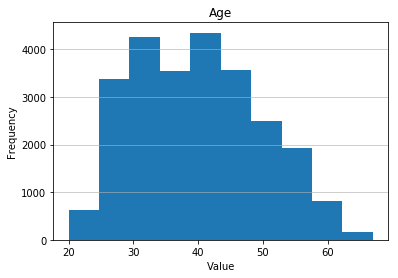

In [64]:
data['Age'].plot.hist()
plt.grid(axis='y', alpha=0.75)
plt.title('Age')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

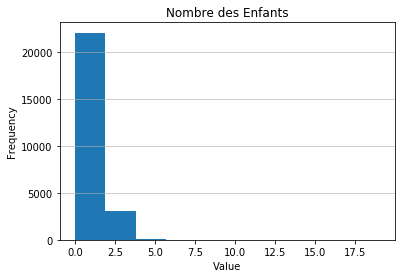

In [65]:
data['NombreEnfants'].plot.hist()
plt.grid(axis='y', alpha=0.75)
plt.title('Nombre des Enfants')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

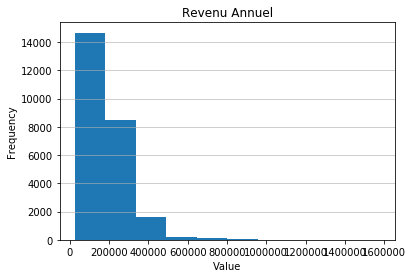

In [66]:
data['RevenuAnnuel'].plot.hist()
plt.grid(axis='y', alpha=0.75)
plt.title('Revenu Annuel')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

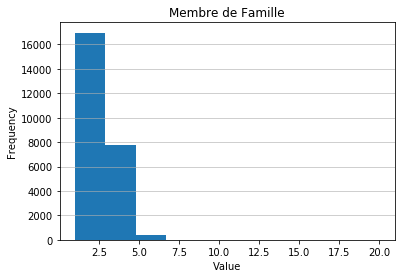

In [67]:
data['MembreFamille'].plot.hist()
plt.grid(axis='y', alpha=0.75)
plt.title('Membre de Famille')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

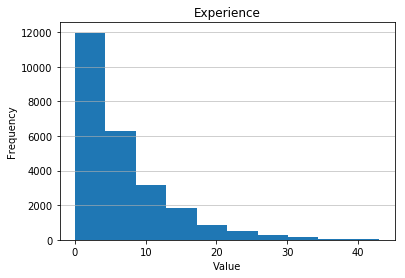

In [68]:
data['Experience'].plot.hist()
plt.grid(axis='y', alpha=0.75)
plt.title('Experience')
plt.xlabel('Value')
plt.ylabel('Frequency')

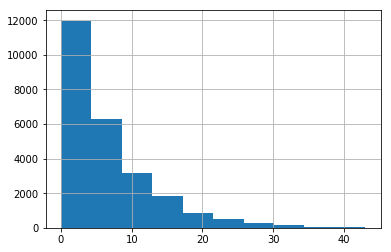

In [44]:
data['Experience'].hist(bins = 10)

Text(0,0.5,'Frequency')

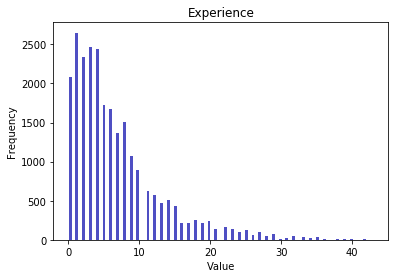

In [72]:
n, bins, patches = plt.hist(data['Experience'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Experience')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

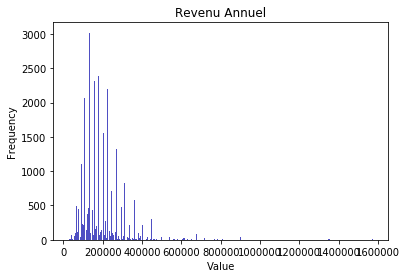

In [73]:
n, bins, patches = plt.hist(data['RevenuAnnuel'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Revenu Annuel')
plt.xlabel('Value')
plt.ylabel('Frequency')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

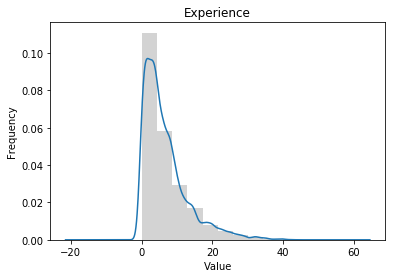

In [80]:
data['Experience'].plot(kind = "hist", normed = True, color = "lightgrey")
data['Experience'].plot(kind = "kde")
plt.title('Experience')
plt.xlabel('Value')
plt.ylabel('Frequency')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

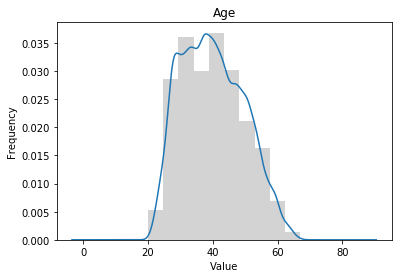

In [81]:
data['Age'].plot(kind = "hist", normed = True, color = "lightgrey")
data['Age'].plot(kind = "kde")
plt.title('Age')
plt.xlabel('Value')
plt.ylabel('Frequency')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


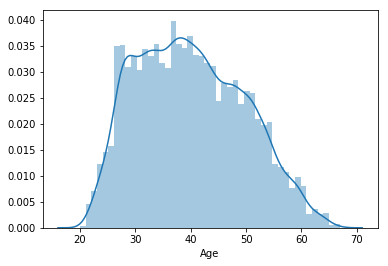

In [83]:
sns.distplot(data.Age, kde=True )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


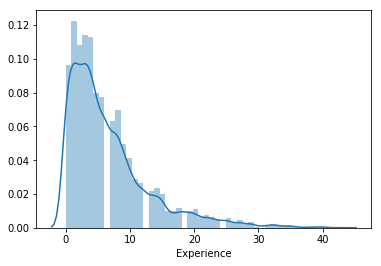

In [84]:
sns.distplot(data.Experience, kde=True )

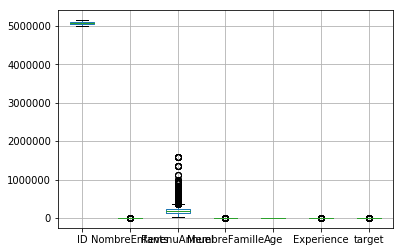

In [85]:
data.boxplot()

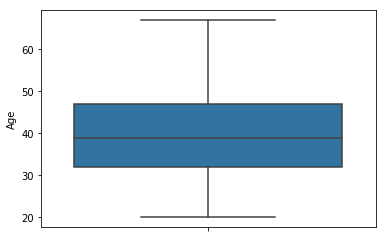

In [86]:
sns.boxplot( data.Age, orient = 'v' )

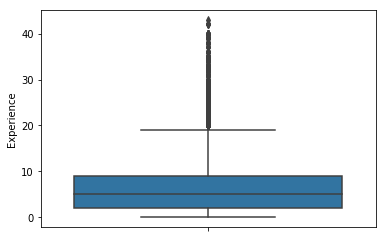

In [87]:
sns.boxplot( data.Experience, orient = 'v' )

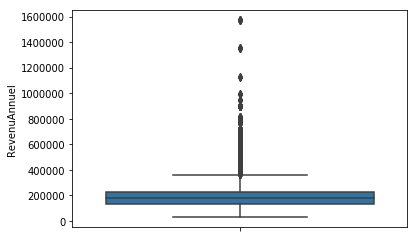

In [88]:
sns.boxplot( data.RevenuAnnuel, orient = 'v' )

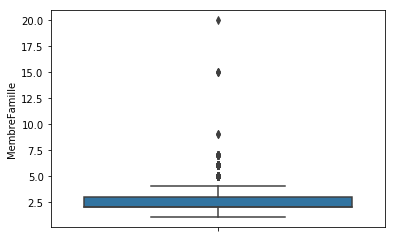

In [89]:
sns.boxplot( data.MembreFamille, orient = 'v' )

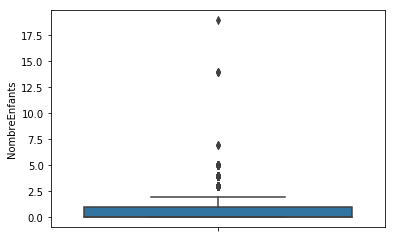

In [90]:
sns.boxplot( data.NombreEnfants, orient = 'v' )

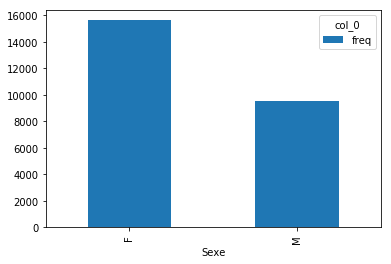

In [92]:
t = pd.crosstab(data.Sexe, "freq")
t.plot.bar()

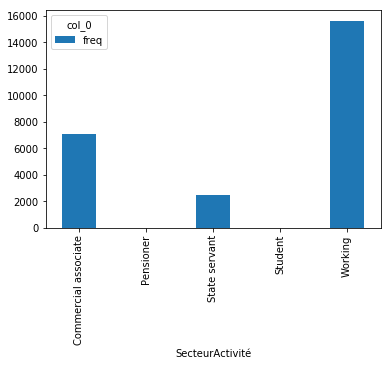

In [96]:
t = pd.crosstab(data.SecteurActivité, "freq")
t.plot.bar()

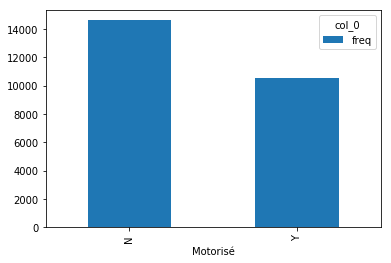

In [94]:
t = pd.crosstab(data.Motorisé, "freq")
t.plot.bar()

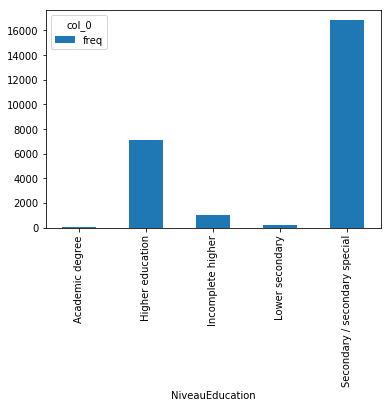

In [98]:
t = pd.crosstab(data.NiveauEducation, "freq")
t.plot.bar()

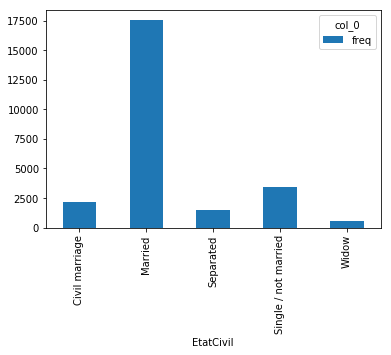

In [99]:
t = pd.crosstab(data.EtatCivil, "freq")
t.plot.bar()

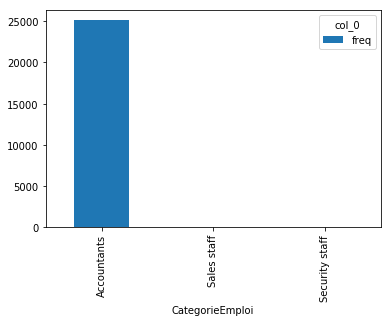

In [100]:
t = pd.crosstab(data.CategorieEmploi, "freq")
t.plot.bar()

Text(0.5,1,'Sexe')

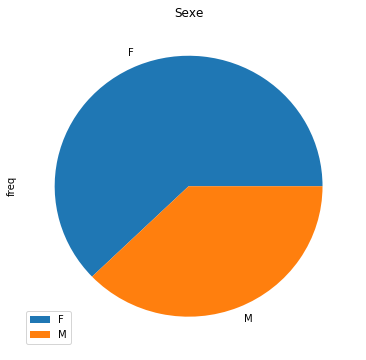

In [112]:
t = pd.crosstab(data.Sexe, "freq")
t.plot.pie(subplots=True, figsize = (6, 6))
plt.title('Sexe')

Text(0.5,1,'Motorisé')

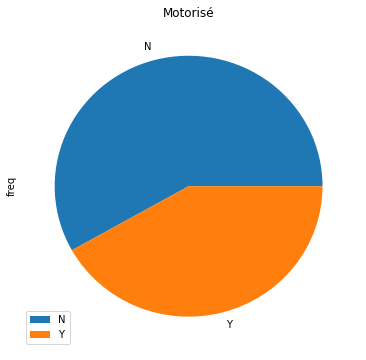

In [113]:
t = pd.crosstab(data.Motorisé, "freq")
t.plot.pie(subplots=True, figsize = (6, 6))
plt.title('Motorisé')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ECD7291D0>],
      dtype=object)

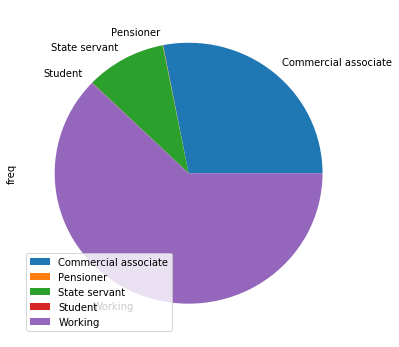

In [104]:
t = pd.crosstab(data.SecteurActivité, "freq")
t.plot.pie(subplots=True, figsize = (6, 6))

Text(0.5,1,'NiveauEducation')

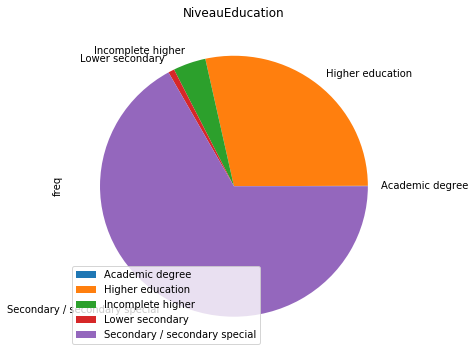

In [114]:
t = pd.crosstab(data.NiveauEducation, "freq")
t.plot.pie(subplots=True, figsize = (6, 6))
plt.title('NiveauEducation')

Text(0.5,1,'EtatCivil')

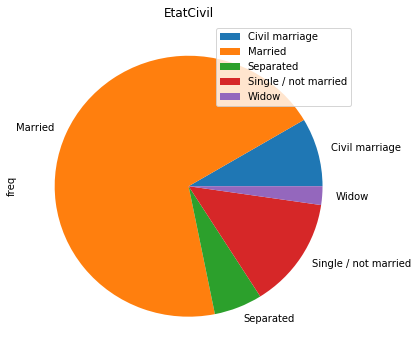

In [115]:
t = pd.crosstab(data.EtatCivil, "freq")
t.plot.pie(subplots=True, figsize = (6, 6))
plt.title('EtatCivil')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ECEABEF60>],
      dtype=object)

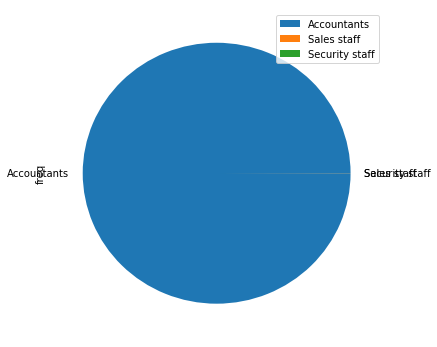

In [111]:
t = pd.crosstab(data.CategorieEmploi, "freq")
t.plot.pie(subplots=True, figsize = (6, 6))

In [121]:
ag = stats.normaltest(data.Age)
print(ag)

NormaltestResult(statistic=1962.1349934815175, pvalue=0.0)


In [123]:
ag = stats.normaltest(data.Experience)
print(ag)

NormaltestResult(statistic=8321.46538714761, pvalue=0.0)


In [124]:
ag = stats.normaltest(data.RevenuAnnuel)
print(ag)

NormaltestResult(statistic=17362.542858867568, pvalue=0.0)


In [125]:
ag = stats.normaltest(data.MembreFamille)
print(ag)

NormaltestResult(statistic=8567.96546710752, pvalue=0.0)


In [126]:
ag = stats.normaltest(data.NombreEnfants)
print(ag)

NormaltestResult(statistic=15977.170770381192, pvalue=0.0)


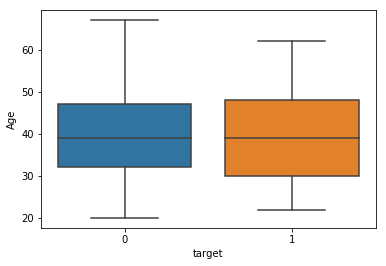

In [136]:
sns.boxplot( x = 'target', y = 'Age', data = data, orient = 'v' )

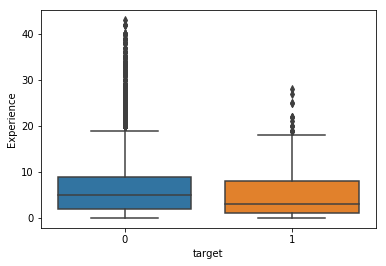

In [137]:
sns.boxplot( x = 'target', y = 'Experience', data = data, orient = 'v' )

In [157]:
df=data
df = df.drop("ID", 1)
df = df.drop('target', 1)
df.head()

,Sexe,Motorisé,PropriétaireImmobilier,NombreEnfants,RevenuAnnuel,SecteurActivité,NiveauEducation,EtatCivil,TypeLogement,CategorieEmploi,MembreFamille,Age,Experience,Approuvée
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,58,3,No
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No
5,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No
6,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,No


In [154]:
df.corr()

,NombreEnfants,RevenuAnnuel,MembreFamille,Age,Experience
NombreEnfants,1.000000,-0.015081,0.902228,-0.256228,-0.064246
RevenuAnnuel,-0.015081,1.000000,-0.025811,0.057923,0.019698
MembreFamille,0.902228,-0.025811,1.000000,-0.212504,-0.048016
Age,-0.256228,0.057923,-0.212504,1.000000,0.338215
Experience,-0.064246,0.019698,-0.048016,0.338215,1.000000


In [159]:
df.corr(method='spearman')

,NombreEnfants,RevenuAnnuel,MembreFamille,Age,Experience
NombreEnfants,1.000000,-0.025071,0.857008,-0.283702,-0.035055
RevenuAnnuel,-0.025071,1.000000,-0.041010,0.051691,0.050607
MembreFamille,0.857008,-0.041010,1.000000,-0.215071,-0.007013
Age,-0.283702,0.051691,-0.215071,1.000000,0.287504
Experience,-0.035055,0.050607,-0.007013,0.287504,1.000000


In [161]:
df.corr(method='kendall')

,NombreEnfants,RevenuAnnuel,MembreFamille,Age,Experience
NombreEnfants,1.000000,-0.020133,0.822633,-0.225241,-0.028141
RevenuAnnuel,-0.020133,1.000000,-0.031852,0.036138,0.035913
MembreFamille,0.822633,-0.031852,1.000000,-0.168932,-0.005860
Age,-0.225241,0.036138,-0.168932,1.000000,0.206395
Experience,-0.028141,0.035913,-0.005860,0.206395,1.000000


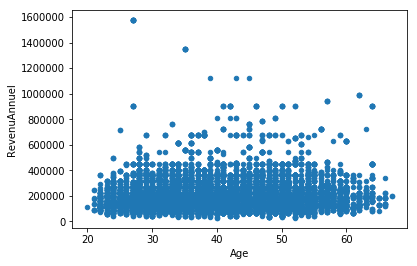

In [163]:
data.plot.scatter("Age", "RevenuAnnuel")

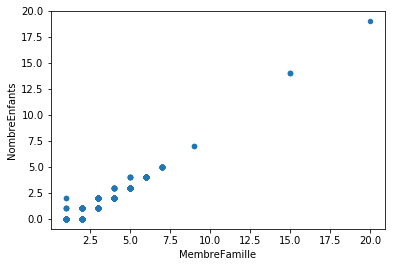

In [164]:
data.plot.scatter("MembreFamille", "NombreEnfants")

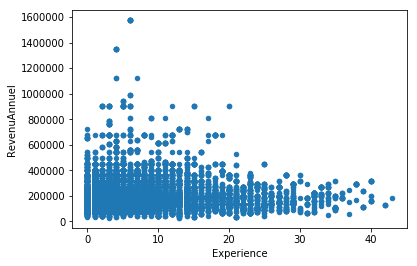

In [165]:
data.plot.scatter("Experience", "RevenuAnnuel")

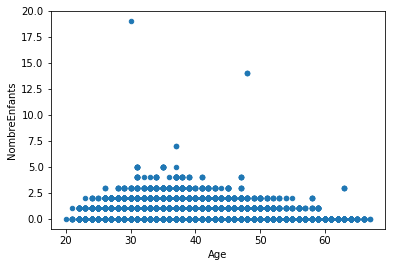

In [166]:
data.plot.scatter("Age", "NombreEnfants")

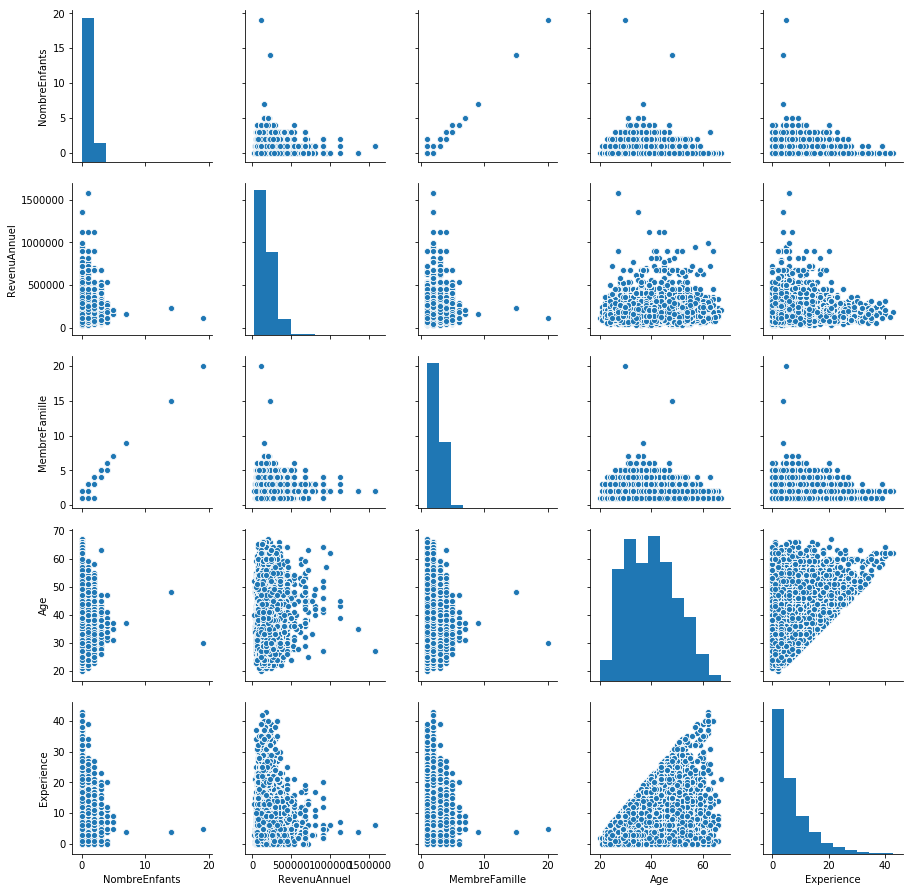

In [173]:
sns.pairplot( df.select_dtypes(include = ['float64', 'int64']).iloc[:, :] )

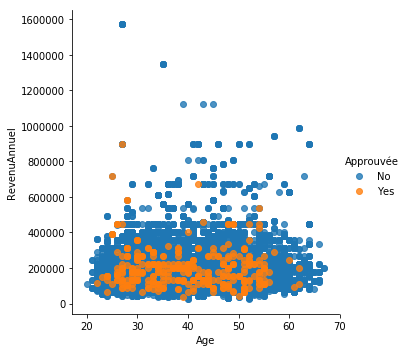

In [176]:
sns.lmplot( x = 'Age', y = 'RevenuAnnuel', hue = 'Approuvée', fit_reg = False, data = data )

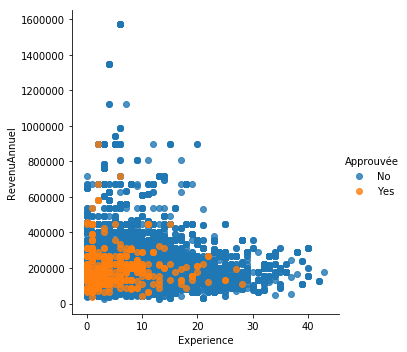

In [177]:
sns.lmplot( x = 'Experience', y = 'RevenuAnnuel', hue = 'Approuvée', fit_reg = False, data = data )

In [211]:
pd.crosstab(data.EtatCivil, data.Sexe)

Sexe,F,M
EtatCivil,,
Civil marriage,1477,656
Married,10352,7157
Separated,1102,365
Single / not married,2133,1312
Widow,566,14


In [212]:
pd.crosstab(data.CategorieEmploi,data.Sexe)

Sexe,F,M
CategorieEmploi,,
Accountants,15626,9503
Sales staff,4,0
Security staff,0,1


In [213]:
pd.crosstab(data.SecteurActivité, data.CategorieEmploi)

CategorieEmploi,Accountants,Sales staff,Security staff
SecteurActivité,,,
Commercial associate,7048,4,0
Pensioner,13,0,0
State servant,2437,0,0
Student,10,0,0
Working,15621,0,1


In [214]:
t=pd.crosstab(data.EtatCivil, data.Sexe)
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(t)
print(st_chi2)
print(st_exp)
print(st_p)

528.5786263431722
4.408891578051256e-113


In [218]:
t=pd.crosstab(data.CategorieEmploi,data.Sexe)
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(t)
print(st_chi2)
print(st_p)

4.0769506378630105
0.13022711440487844


In [216]:
t=pd.crosstab(data.SecteurActivité, data.CategorieEmploi)
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(t)
print(st_chi2)
print(st_p)

10.866604544243394
0.20937273854696314


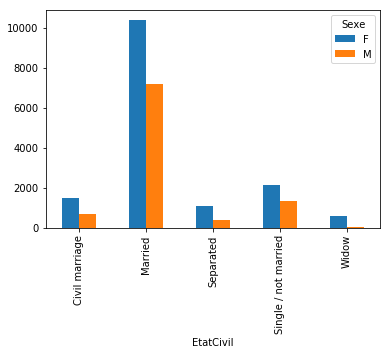

In [221]:
t=pd.crosstab(data.EtatCivil,data.Sexe)
t.plot.bar()

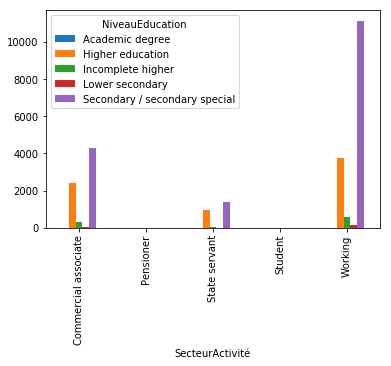

In [224]:
t=pd.crosstab(data.SecteurActivité, data.NiveauEducation)
t.plot.bar()

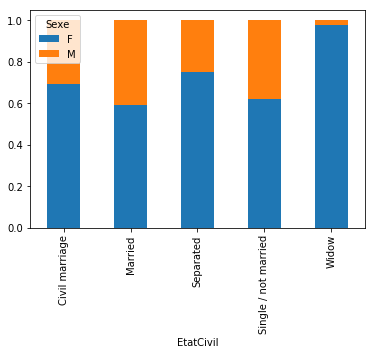

In [225]:
t = pd.crosstab(data.EtatCivil,data.Sexe, normalize="index")
t.plot.bar(stacked=True)

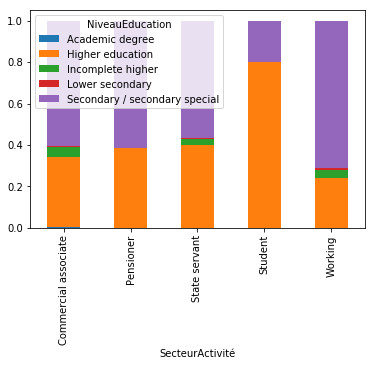

In [226]:
t = pd.crosstab(data.SecteurActivité, data.NiveauEducation, normalize="index")
t.plot.bar(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EDCD45550>,
      dtype=object)

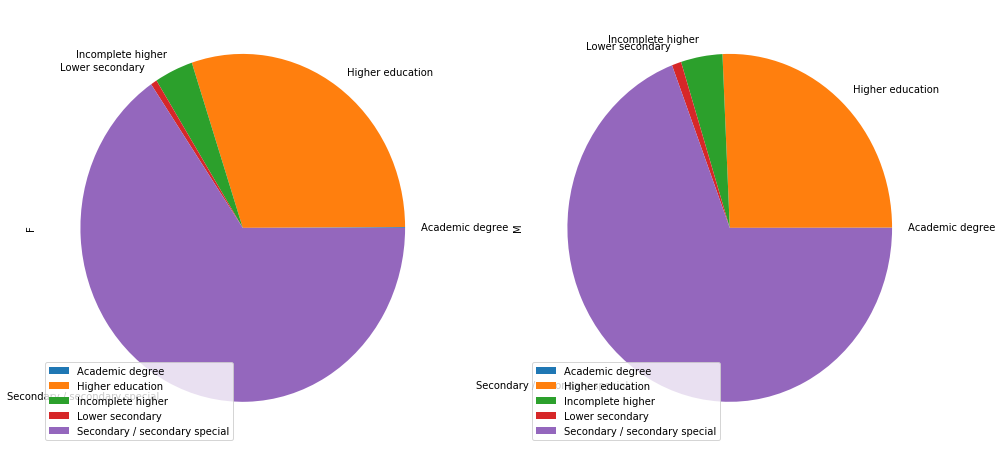

In [235]:
t = pd.crosstab(data.NiveauEducation, data.Sexe)
t.plot.pie(subplots=True, figsize = (16, 8))

In [238]:
df.groupby("Sexe").mean()

,NombreEnfants,RevenuAnnuel,MembreFamille,Age,Experience
Sexe,,,,,
F,0.499808,179169.173321,2.257134,40.829687,7.329750
M,0.532934,220595.522254,2.354798,38.703388,5.647201


In [243]:
df.groupby("Sexe")["Age"].agg([np.mean, np.std, np.median, np.min, np.max])

,mean,std,median,amin,amax
Sexe,,,,,
F,40.829687,9.290371,40,20,67
M,38.703388,9.835214,38,21,66


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EDD2CCEB8>,
      dtype=object)

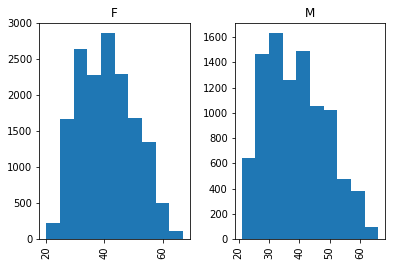

In [245]:
data.hist(column = "Age", by = "Sexe")

Text(0.5,0,'RevenuAnnuel')

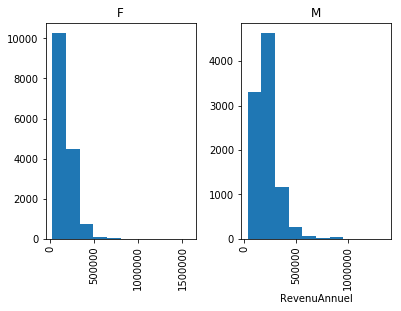

In [247]:
data.hist(column = "RevenuAnnuel", by = "Sexe")
plt.xlabel('RevenuAnnuel')

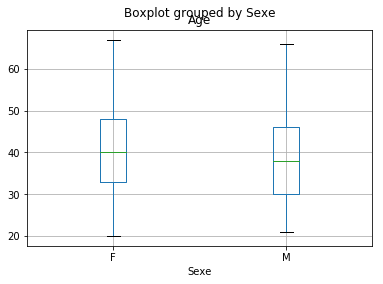

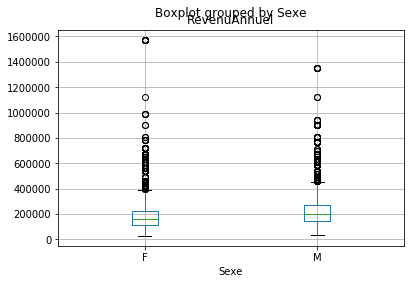

In [255]:
df.boxplot(column = "Age", by = "Sexe")
df.boxplot(column = "RevenuAnnuel", by = "Sexe")

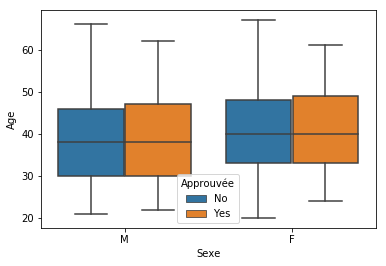

In [252]:
sns.boxplot( x = 'Sexe', y = 'Age', hue = 'Approuvée', data = data, orient = 'v' )

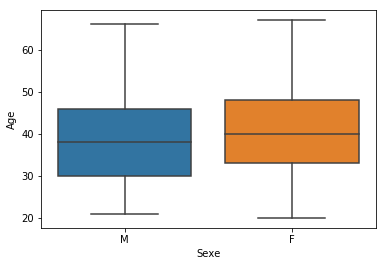

In [257]:
sns.boxplot( x = 'Sexe', y = 'Age', data = data, orient = 'v' )

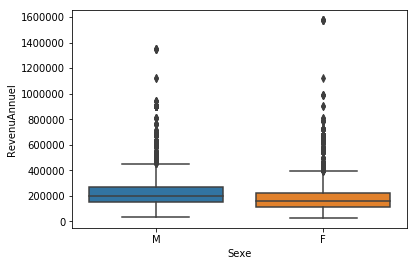

In [258]:
sns.boxplot( x = 'Sexe', y = 'RevenuAnnuel', data = data, orient = 'v' )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


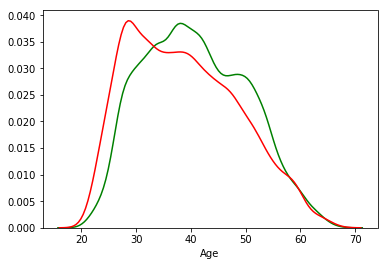

In [259]:
sns.distplot( data[data.Sexe == 'F'].Age, color = 'g', hist = False ) 
sns.distplot( data[data.Sexe == 'M'].Age, color = 'r', hist = False )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


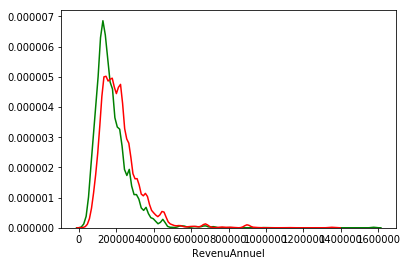

In [260]:
sns.distplot( data[data.Sexe == 'F'].RevenuAnnuel, color = 'g', hist = False ) 
sns.distplot( data[data.Sexe == 'M'].RevenuAnnuel, color = 'r', hist = False )